import pandas as pd
import numpy as np 
df = pd.read_csv(r'.\input\wawa_all_detail_20230813-215105.csv',delimiter=';')

In [2]:
df['district'].unique()

array(['Praga-Południe', 'Ursynów', 'Wawer', 'Mokotów', 'Włochy', 'Ursus',
       'Ochota', 'Śródmieście', 'Wilanów', 'Żoliborz', 'Wola', 'Bemowo',
       nan, 'Targówek', 'Praga-Północ', 'Bielany', 'Wesoła', 'Białołęka',
       'Rembertów'], dtype=object)

In [3]:
 'publicId',
 'advertType',#['AGENCY', 'PRIVATE', 'DEVELOPER_UNIT']
 'createdAt',
 'modifiedAt',
 'exclusiveOffer',#[False,  True] only4 VIVA INVEST
 'features',#'telewizja kablowa,internet,meble,balkon,piwnica,garaż/miejsce parkingowe,winda,oddzielna kuchnia',
 'Extras_types',#'air_conditioning,balcony,basement,garage,garden,lift,usable_room',
 'title',
 'agency',
 'adCategoryname',#['FLAT', 'COMMERCIAL_PROPERTY'] only1
 'latitude',
 'longitude',
 'cityname',
 'districtname',
 'streetname',
 'rent', 
 'condition',#['TO_RENOVATION', 'READY_TO_USE', 'TO_COMPLETION', nan]
 'ownership',#['FULL_OWNERSHIP', nan, 'LIMITED_OWNERSHIP', 'SHARE', 'USUFRUCT'],
 'Area',
 'Building_floors_num',
 'Building_type',#['house', 'block', 'apartment', 'tenement', nan, 'ribbon', 'infill','loft'], 
 'Building_material',#['brick', 'concrete_plate', nan, 'other', 'reinforced_concrete','breezeblock', 'concrete', 'silikat', 'cellular_concrete', 'wood']
 'Build_year', 
 'Floor_no',
 'Heating',#['gas', 'urban', nan, 'boiler_room', 'other', 'electrical'],
 'MarketType',#['secondary', 'primary'], 
 'Price',
 'Rooms_num',
 'Windows_type',#['wooden', nan, 'plastic', 'aluminium']
 'Lift',
 'voivodeship',
 'city_or_village',
 'district',#['Praga-Południe', 'Ursynów', 'Wawer', 'Mokotów', 'Włochy', 'Ursus', 'Ochota', 'Śródmieście', 'Wilanów', 'Żoliborz', 'Wola', 'Bemowo', 'Targówek', 'Praga-Północ', 'Bielany', 'Wesoła', 'Białołęka','Rembertów']
 'residential',#96NA
 'commune',#[nan, 'Nieporęt', 'Piaseczno', 'Łomianki', 'Lesznowola',
 'county'#[nan, 'wołomiński', 'legionowski', 'piaseczyński', 'pruszkowski','warszawski zachodni', 'otwocki']

# OBSolete
'adCategorytype','costs','OfferType',
'Construction_status',#['to_renovation', 'ready_to_use', 'to_completion', nan]
'ProperType',#['mieszkanie', 'lokal']

('ProperType',)

In [2]:
mycols=['id',
 'publicId',
 'advertType',#['AGENCY', 'PRIVATE', 'DEVELOPER_UNIT']
 'MarketType',#['secondary', 'primary'], 
 'title',
 'Price',
 'Area',
 'Rooms_num',
 'createdAt',
 'modifiedAt',
#  'features',
#  'Extras_types',
 'agency',
 'rent', 
 'condition',#['TO_RENOVATION', 'READY_TO_USE', 'TO_COMPLETION', nan]
 'ownership',#['FULL_OWNERSHIP', nan, 'LIMITED_OWNERSHIP', 'SHARE', 'USUFRUCT'],
 'Building_type',#['house', 'block', 'apartment', 'tenement', nan, 'ribbon', 'infill','loft'], 
 'Building_material',#['brick', 'concrete_plate', nan, 'other', 'reinforced_concrete','breezeblock', 'concrete', 'silikat', 'cellular_concrete', 'wood']
 'Heating',#['gas', 'urban', nan, 'boiler_room', 'other', 'electrical'],
 'Windows_type',#['wooden', nan, 'plastic', 'aluminium']
 'Build_year', 
 'Lift',
 'Floor_no',
 'Building_floors_num',

 'latitude',
 'longitude',
 'cityname',
 'districtname',
 'streetname',
 'voivodeship',
 'city_or_village',
 'district',
 'residential',]

 
prev_cols=['id',
 'advertType',
 'title',
 'Price_pm',
 'Price',
 'Area',
 'Rooms_num',
 'condition',#['TO_RENOVATION', 'READY_TO_USE', 'TO_COMPLETION', nan] 
 'Build_year', 
 'Floor_no',
 'Building_floors_num',
 'streetname', 
 'district',
 'residential',]


In [3]:
df=df[mycols]


In [7]:
# ASTYPE
# df[col].astype('category')

# applyFUNCTION
# def convert_currency(val):
#     """
#     Convert the string number value to a float
#      - Remove $
#      - Remove commas
#      - Convert to float type
#     """
#     new_val = val.replace(',','').replace('$', '')
#     return float(new_val)
# df['2016'].apply(convert_currency)

# CONVERT to BOOL
# df["Active"] = np.where(df["Active"] == "Y", True, False)

# HELPERS
# pd.to_numeric()
# pd.to_numeric(df['Jan Units'], errors='coerce').fillna(0)
# pd.to_datetime() 

In [4]:
# TYPE correction
category_cols = ['condition','advertType','MarketType','ownership','Building_type','Building_material','Heating','Windows_type',]
for col in category_cols:
    df[col]=df[col].astype('category')

df['Price']=df['Price'].astype('float')
df['rent']=df['rent'].round().astype('float')

def convert_Rooms_num(val):
    if val == 'more':
        return 99.0
    else:
        return float(val)
df['Rooms_num']=df['Rooms_num'].apply(convert_Rooms_num).astype('Int64')
df['Building_floors_num']=df['Building_floors_num'].apply(convert_Rooms_num).astype('Int64')

def convert_Floor_no(val):
    if val == 'ground_floor':
        return 0
    elif val == 'garret':
        return -1
    elif val == 'cellar':
        return 99
    elif val == 'floor_higher_10':
        return 99
    elif type(val) == str:
        return float(val.replace('floor_',''))
df['Floor_no']=df['Floor_no'].apply(convert_Floor_no).astype('Int64')

df['createdAt']=pd.to_datetime(df['createdAt'],utc=True) 
df['modifiedAt']=pd.to_datetime(df['modifiedAt'],utc=True) 
df['Build_year']=df['Build_year'].astype('Int64')

df["Lift"] = np.where(df["Lift"] == "y", True, False)


In [5]:
# CALCULATE new cols
df["Price_pm"] = round(df["Price"] / df["Area"] / 1000, 2)
df["parter"] = np.where((df["Floor_no"].notna()) & (df["Floor_no"] == 0), True, False)
df["last"] = np.where(
    (df["Floor_no"].notna())
    & (df["Building_floors_num"].notna())
    & (df["Floor_no"] >= df["Building_floors_num"]),
    True,
    False,
)
Price_cat = {
    "Śródmieście": 5,
    "Wola": 5,
    "Wilanów": 5,
    "Mokotów": 4,
    "Włochy": 4,
    "Ochota": 4,
    "Żoliborz": 4,
    "Wawer": 3,
    "Ursynów": 3,
    "Praga-Południe": 3,
    "Praga-Północ": 3,
    "Bielany": 3,
    "Bemowo": 2,
    "Targówek": 2,
    "Ursus": 2,
    "Wesoła": 1,
    "Białołęka": 1,
    "Rembertów": 1,
}
df["Price_cat"] = df["district"].map(Price_cat).astype("category")

def clasify_Building_type(row:pd.Series):
    
    hc1=row['Building_floors_num']<3

    bc1=row['Build_year']>1970
    bc2=row['Lift'] == True
    bc3=row['Building_material']in['concrete_plate']
    bc4=row['Building_floors_num']>6
    
    kc1=row['Build_year']<=1970

    if pd.notna(row['Building_type']):
        if row['Building_type']=='apartment':
            return 'block'
        else:
            return row['Building_type']
    else:
        if pd.notna(hc1)&hc1:
            return 'house'
        if pd.notna(bc1)&bc1:
            return 'block'
        if pd.notna(bc3)&bc3:
            return 'block'
        if pd.notna(bc4)&bc4:
            return 'block'
        if pd.notna(bc2)&bc2:
            return 'block'
        if pd.notna(kc1)&kc1:
            return 'tenement' #kamienica            
df['MY_Building_type']=df.apply(clasify_Building_type,axis=1)

def clasify_condition(row:pd.Series):
    
    yc1=row['Build_year']>2010
    wc1=row['Windows_type'] == 'wooden'

    if pd.notna(row['condition']):
        return row['condition']
    else:
        if pd.notna(yc1)&yc1:
            return 'READY_TO_USE'
        if pd.notna(wc1)&wc1:
            return 'TO_RENOVATION'
df['MY_condition']=df.apply(clasify_condition,axis=1)

# FILLNA

In [28]:
# df.info()
df.loc[:,prev_cols].isna().sum()


id                        0
advertType                0
title                     0
Price_pm               2888
Price                  2888
Area                      0
Rooms_num                 1
condition              1399
Build_year              669
Floor_no                 78
Building_floors_num     201
streetname             1850
district                 96
residential              96
dtype: int64

In [6]:
c1=df['Building_type'].isna()
c2=df['Price_pm']>5
c3=df['Price_pm']<25
c4=df['MarketType']=='secondary'
c5=df['Price']<1500000
c6=df['Area']<150
c7=df['Rooms_num']<6
c8=df['ownership'].apply(lambda x: x not in ['LIMITED_OWNERSHIP', 'SHARE', 'USUFRUCT'])

c9=df['district']=='Targówek'
c10=df['Rooms_num']=='Zacisze'

df.loc[c1&c2&c3&c4&c5&c6&c7&c8,prev_cols]
df.loc[df['Building_type']=='apartment',prev_cols]


,id,advertType,title,Price_pm,Price,Area,Rooms_num,condition,Build_year,Floor_no,Building_floors_num,streetname,district,residential
3,47261366,AGENCY,Cztery pokoje na Mokotowie przy parku.,20.62,2000000.0,97.00,4,NaN,2009,2,6,ul. Belwederska,Mokotów,Sielce
4,48075474,AGENCY,Pola Mokotowskie! Apartament z ogrodem na dachu !,18.41,2799000.0,152.00,5,NaN,2006,3,3,ul. Jana Karola Chodkiewicza,Mokotów,Wyględów
7,52507343,PRIVATE,"Jedyne takie dwa ogródki 30/15 m2 , tuż przy park",15.20,912000.0,60.00,2,READY_TO_USE,<NA>,0,4,ul. Włodarzewska,Ochota,Szczęśliwice
8,53415712,AGENCY,Apartament z Recepcją blisko Centrum ! WYKOŃCZONY,14.31,415000.0,29.00,1,TO_COMPLETION,<NA>,<NA>,<NA>,al. Aleje Jerozolimskie,Włochy,Raków
9,53870704,AGENCY,"Mieszkanie, 135 m², Warszawa",17.41,2350000.0,135.00,4,READY_TO_USE,2000,4,6,NaN,Mokotów,Stegny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,64495733,PRIVATE,Gotowy 2pok Apartment/ Włohy,17.89,567000.0,31.70,2,READY_TO_USE,2022,<NA>,<NA>,Wiktoryn,Włochy,Stare Włochy
10174,64495750,PRIVATE,"Bezpośrednio, dwupokojowe mieszkanie na Żoliborzu",23.61,1100000.0,46.60,2,READY_TO_USE,<NA>,8,10,ul. Przasnyska,Żoliborz,Sady Żoliborskie
10178,64495917,AGENCY,Apartament w inwestycji Dantex Aurora,20.07,1190000.0,59.28,3,TO_COMPLETION,2023,0,6,Wschodu Słońca,Włochy,Raków
10180,64495966,AGENCY,"Ciche, Widne I Słoneczne! Duży Balkon!",19.89,1820000.0,91.50,3,NaN,2010,2,6,NaN,Żoliborz,Sady Żoliborskie


In [18]:
# ZWYKLE
c1=df['MY_Building_type']=='block' #20%bez kategorii
c2=df['Price_pm']>5
c3=df['Price_pm']<25
c4=df['MarketType']=='secondary'
c5=(df['Price']>250000)&(df['Price']<800000)
c6=(df['Area']>20)&(df['Area']<75)
c7=(df['Rooms_num']>1)&(df['Rooms_num']<4)
c8=df['ownership'].apply(lambda x: x not in ['LIMITED_OWNERSHIP', 'SHARE', 'USUFRUCT'])
c9=df['Building_floors_num']<14

df['Build_year'].fillna(1980)
c10=df['Build_year']<2000

# c9=df['district']=='Targówek'
# c10=df['Rooms_num']=='Zacisze'

zwykle=df.loc[c1&c2&c3&c4&c5&c6&c7&c8&c9&c10]
zwykleplus=df.loc[c1&c2&c3&c4&c8&c9&c10]


In [10]:
c4=df['MarketType']=='primary'
nowe=df.loc[c1&c2&c3&c4&c5&c6&c7&c8&c9]

In [8]:
zwykle.describe()
zwykle.district.value_counts()

,id,Price,Area,Rooms_num,rent,Build_year,Floor_no,Building_floors_num,latitude,longitude,Price_pm
count,5.290000e+02,529.000000,529.000000,529.0,377.000000,529.0,528.0,529.0,529.000000,529.000000,529.000000
mean,6.426579e+07,636816.516068,48.751210,2.489603,664.771883,1968.544423,5.143939,7.281664,52.235865,21.001791,13.399905
std,3.690167e+05,98315.453880,9.795024,0.500365,180.329813,91.88443,12.026778,3.216621,0.043088,0.061994,2.562004
min,6.110781e+07,369000.000000,26.400000,2.0,350.000000,75.0,0.0,1.0,52.129232,20.864585,8.310000
25%,6.423567e+07,563000.000000,40.000000,2.0,550.000000,1968.0,1.0,4.0,52.203019,20.950040,11.500000
50%,6.441500e+07,645000.000000,48.600000,2.0,620.000000,1974.0,3.0,8.0,52.238250,20.997890,13.150000
75%,6.446245e+07,710000.000000,56.000000,3.0,780.000000,1980.0,6.0,10.0,52.268190,21.047780,14.860000
max,6.449572e+07,799999.000000,72.000000,3.0,1345.000000,1999.0,99.0,13.0,52.347243,21.229590,21.250000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Wesoła'),
  Text(1, 0, 'Białołęka'),
  Text(2, 0, 'Rembertów'),
  Text(3, 0, 'Targówek'),
  Text(4, 0, 'Wawer'),
  Text(5, 0, 'Ursus'),
  Text(6, 0, 'Bemowo'),
  Text(7, 0, 'Praga-Południe'),
  Text(8, 0, 'Ursynów'),
  Text(9, 0, 'Praga-Północ'),
  Text(10, 0, 'Bielany'),
  Text(11, 0, 'Mokotów'),
  Text(12, 0, 'Ochota'),
  Text(13, 0, 'Żoliborz'),
  Text(14, 0, 'Włochy'),
  Text(15, 0, 'Wola'),
  Text(16, 0, 'Śródmieście')])

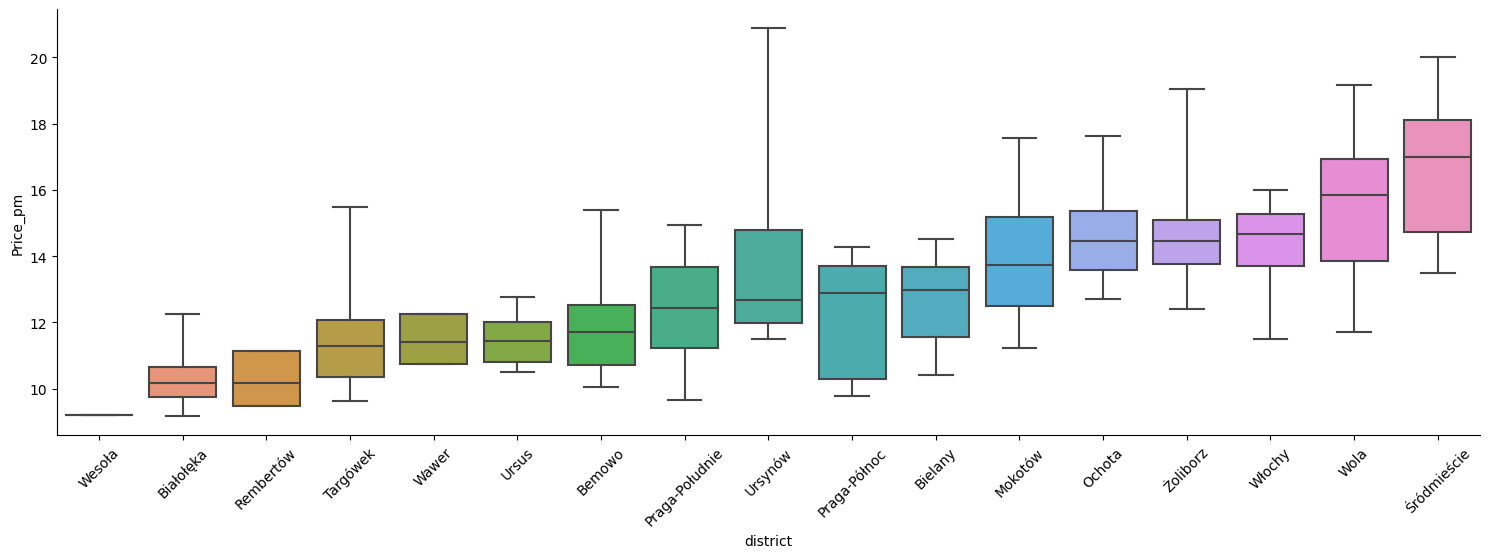

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

ords=zwykle.groupby('district')['Price_pm'].median().sort_values().index
sns.catplot(x='district', y='Price_pm', data=zwykle, kind='box', sym='', whis=[5,95], aspect=3, order=ords)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Wesoła'),
  Text(1, 0, 'Białołęka'),
  Text(2, 0, 'Bielany'),
  Text(3, 0, 'Rembertów'),
  Text(4, 0, 'Ursus'),
  Text(5, 0, 'Targówek'),
  Text(6, 0, 'Wawer'),
  Text(7, 0, 'Wilanów'),
  Text(8, 0, 'Włochy'),
  Text(9, 0, 'Żoliborz'),
  Text(10, 0, 'Praga-Południe'),
  Text(11, 0, 'Praga-Północ'),
  Text(12, 0, 'Bemowo'),
  Text(13, 0, 'Śródmieście'),
  Text(14, 0, 'Ursynów'),
  Text(15, 0, 'Wola'),
  Text(16, 0, 'Ochota'),
  Text(17, 0, 'Mokotów')])

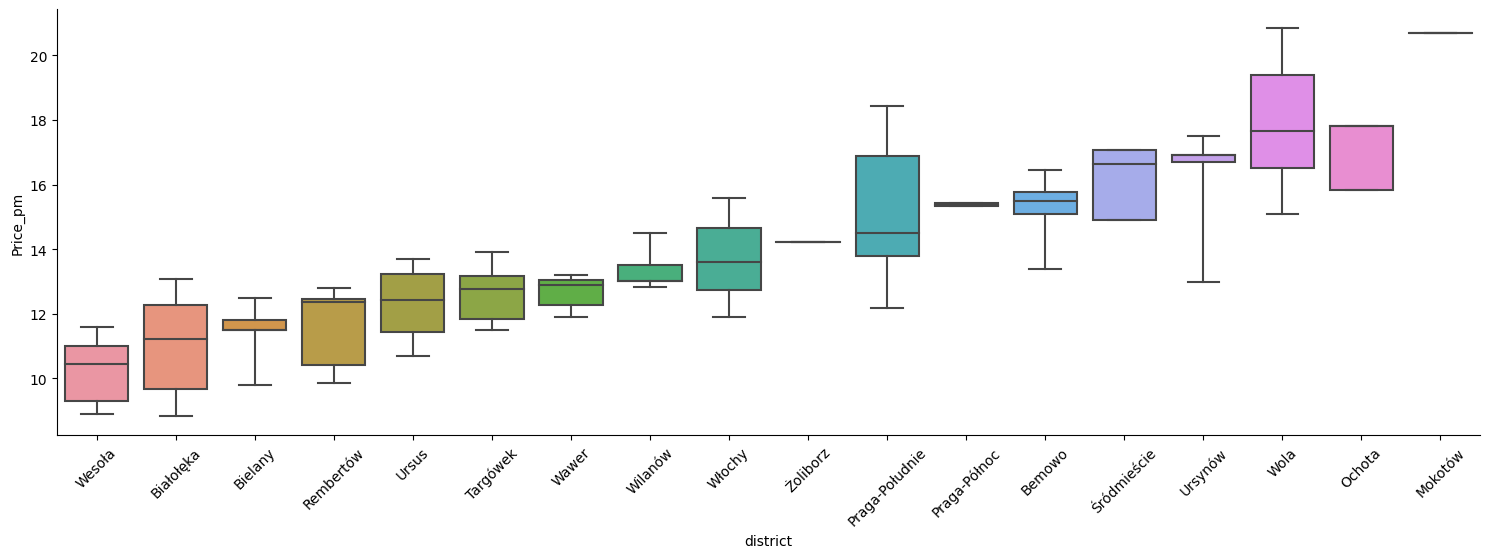

In [12]:
ords=nowe.groupby('district')['Price_pm'].median().sort_values().index
sns.catplot(x='district', y='Price_pm', data=nowe, kind='box', sym='', whis=[5,95], aspect=3, order=ords)
plt.xticks(rotation=45)

In [70]:
# zwykle.groupby('district')['Price_pm'].median()
c0=zwykle['district']=='Śródmieście'
c1=zwykle['residential'].isin(['Grabów','Stary Służew'])
zwykle[c0].groupby('residential')['Price_pm'].median().round(1).sort_values()

residential
Solec                     16.2
Śródmieście Północne      16.4
Ujazdów                   16.5
Stare Miasto              16.7
Muranów                   16.9
Nowe Miasto               17.4
Powiśle                   19.0
Śródmieście Południowe    20.3
Name: Price_pm, dtype: float64

In [ ]:
Price_med = {
    "Śródmieście": 5, 16,5/20
    "Mokotów": 4, 15,5
    "Wilanów": 5,

    "Wola": 5, 14,5
    "Włochy": 4, 14,6
    "Ochota": 4, 14,5
    "Żoliborz": 4, 14/19
    "Wawer": 3,

    "Ursynów": 3, 13,0
    "Praga-Południe": 3, 13,3
    "Praga-Północ": 3, 13,5/11

    "Bielany": 3, 12,7
    "Bemowo": 2, 11,9

    "Targówek": 2,11,5
    "Ursus": 2, 11,3
    "Białołęka": 1, 11,2 
    "Wesoła": 1,
    "Rembertów": 1,
}

# 11,5-12-13,5-14,5-15,5-16,5

# Gocław        11.7
# Gocławek      11.7
# Grochów       13.3
# Saska Kępa    14.5
# Kamionek      16.8

# Czerniaków       12.3
# Służew           13.1
# Sielce/Stegny    14.1
# Stary Mokotów    15.5
# Służewiec        16.3

# Odolany      13.7
# Ulrychów     13.8
# Nowolipki    14.0
# Koło         14.8
# Młynów       15.2
# Czyste       16.3
# Mirów        18.2